<a href="https://colab.research.google.com/github/Veron28/bot_test/blob/master/TimeSeriesVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b><font color="black" size="+4">Time Series Visualization by Data Secrets</font></b>


<b><font color="black" size="+2">Colab created by:</font></b>

Telegram: [@DataSecrets](https://t.me/+DuwnB6pn4UYwM2I6)

```
Чтобы получить результат, поочередно нажимайте на запуск ячеек, дожидаясь завершения выполнения каждого блока.
```

**Временные ряды** — это ключевой вид данных в Data Science. Анализ временных рядов не может обойтись без **визуализации данных**, и один график может заменить многостраничный отчет. Читайте далее, как строить базовые диаграммы, выстраивать сезонность, а также как группировать данные по разным промежуткам времени в рамках анализа временных рядов в Python.



Мы воспользуемся датасетом с данными фондового рынка S&P 500. В этом датасете содержится 7 столбцов:

*   Date — дата в формате yy-mm-dd. 
*   Open — цена акции при открытии рынка в долларах США. 
*   High — самая высокая цена за день. 
*   Low — самая низкая цена за день. 
*   Close — цена при закрытии.
*   Volume — количество проданных акций. 
*   Name — тикер акции.






In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rashida048/Datasets/master/stock_data.csv', parse_dates=True, index_col='Date') 
df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


Мы можем воспользоваться встроенными в Pandas возможностями визуализации данных. Например, следующий график в Python построит количество проданных акций в зависимости от даты:

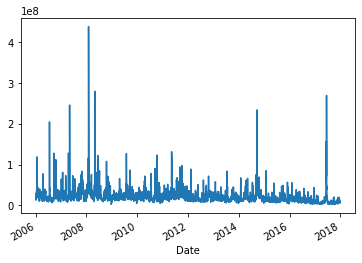

In [ ]:
df['Volume'].plot()

Это график выглядит перегруженным. Давай построим все остальные атрибуты в зависимости от даты. 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fca033618d0>,
      dtype=object)

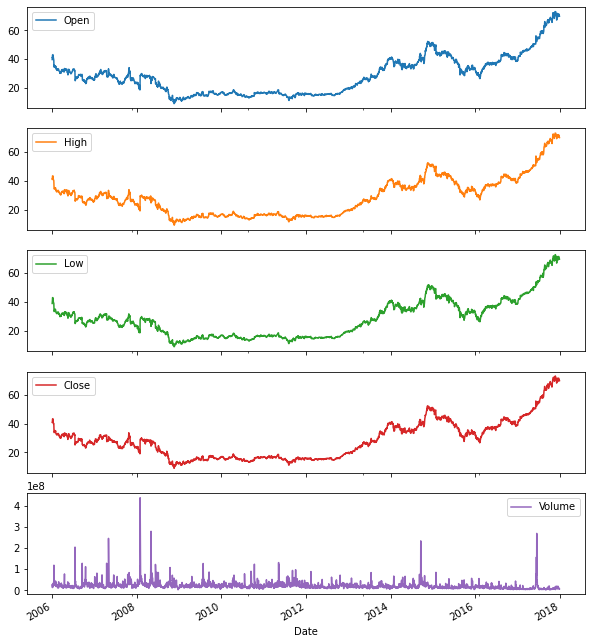

In [ ]:
df.plot(subplots=True, figsize=(10,12))

Еще одна важная характкристика временного ряда - сезонность. Для отображения сезонности подходят гистограммы. Мы сгруппируем по месяцу и выберем среднее значение. 

<BarContainer object of 24 artists>

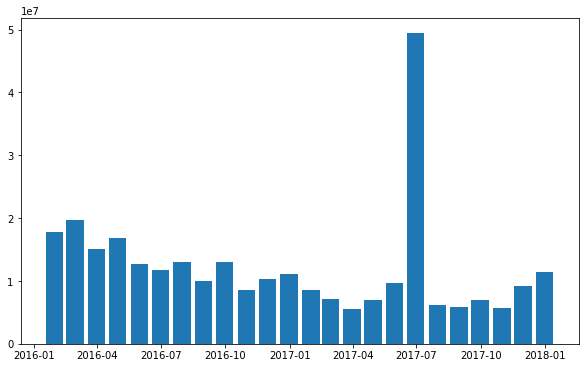

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
# Группировка за месяц
df_month = df.resample('M').mean()
fig, ax = plt.subplots(figsize=(10, 6))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
ax.bar(
df_month['2016':].index, 
df_month.loc['2016':, 'Volume'], 
width=25, align='center')

Еще одним полезным инструментом анализа сезонности временных рядов является диаграмма размаха (или ящики с усами).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to 

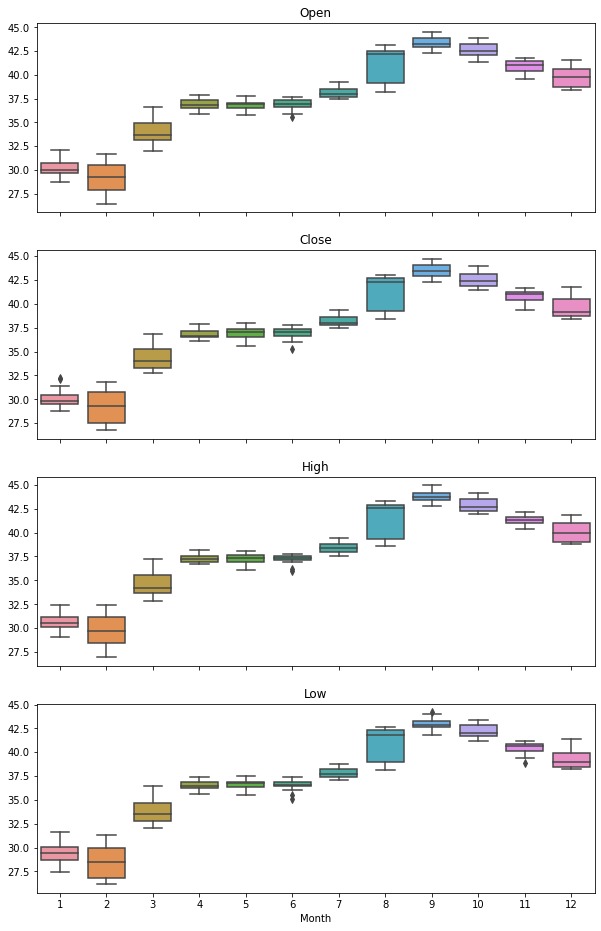

In [ ]:
import seaborn as sns
df['Month'] = df.index.month
fig, axes = plt.subplots(4, 1, figsize=(10, 16), sharex=True)
for name, ax in zip(['Open', 'Close', 'High', 'Low'], axes):
  sns.boxplot(data=df['2016'], x='Month', y=name, ax=ax)
  ax.set_ylabel('')
  ax.set_title(name)
  if ax != axes[-1]: # установить ось Х только для последнего
    ax.set_xlabel('')

Выше можем видеть, как изменяется цена за акцию с течением времени, именно такое поведение наблюдать на фондовых биржах.

Тренды за разные периоды времени можно строить на одном графике. Например, построим графики за с ежедневными и недельными отчетами на закрытие (Open) за 2015 год. 


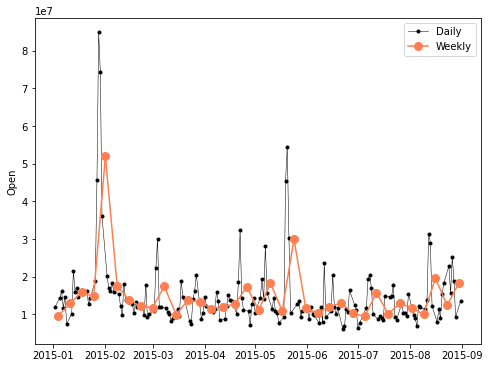

In [ ]:
df_week = df.resample('W').mean()
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(df.loc['2015-01':'2015-08', 'Volume'],  marker='.', 
        linestyle='-',  linewidth = 0.5, 
        label='Daily', color='black')
ax.plot(df_week.loc['2015-01':'2015-08', 'Volume'], 
        marker='o', markersize=8, 
        linestyle='-', label='Weekly', 
        color='coral')
ax.set_ylabel('Open')
ax.legend()

Чем выше частота, тем больше появляется взлетов и падений, и наоборот, чем ниже частота, тем тренд становится более глаже. Месячный отчет был бы ещё плавнее, чем недельный.

**Надеемся, эта статья поможет тебе сделать твои исследования и отчеты более глубокими. Помни, что визуализация – инструмент настоящего профессионала.**